### <h1> Task 2 <h1> (Скалярное произведение векторов)

In [32]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
data_atomic = pd.read_csv('data/scalar_atomic.csv')
data_lock = pd.read_csv('data/scalar_lock.csv')
data_critical = pd.read_csv('data/scalar_critical.csv')
data_reduction = pd.read_csv('data/scalar_reduction.csv')
display(data_atomic)
display(data_lock)
display(data_critical)
display(data_reduction)

,Num_Threads,Iter,Time
0,1,90,1306
1,2,90,361
2,3,90,188
3,4,90,263
4,5,90,290
...,...,...,...
91,12,9000000,516646
92,13,9000000,520451
93,14,9000000,522304
94,15,9000000,512129


,Num_Threads,Iter,Time
0,1,90,60
1,2,90,61
2,3,90,61
3,4,90,98
4,5,90,103
...,...,...,...
91,12,9000000,6066440
92,13,9000000,9593566
93,14,9000000,9125433
94,15,9000000,10455319


,Num_Threads,Iter,Time
0,1,90,53
1,2,90,55
2,3,90,61
3,4,90,75
4,5,90,69
...,...,...,...
91,12,9000000,4181090
92,13,9000000,6859521
93,14,9000000,8227550
94,15,9000000,9667655


,Num_Threads,Iter,Time
0,1,90,44
1,2,90,49
2,3,90,36
3,4,90,35
4,5,90,32
...,...,...,...
91,12,9000000,14655
92,13,9000000,21817
93,14,9000000,20330
94,15,9000000,20412


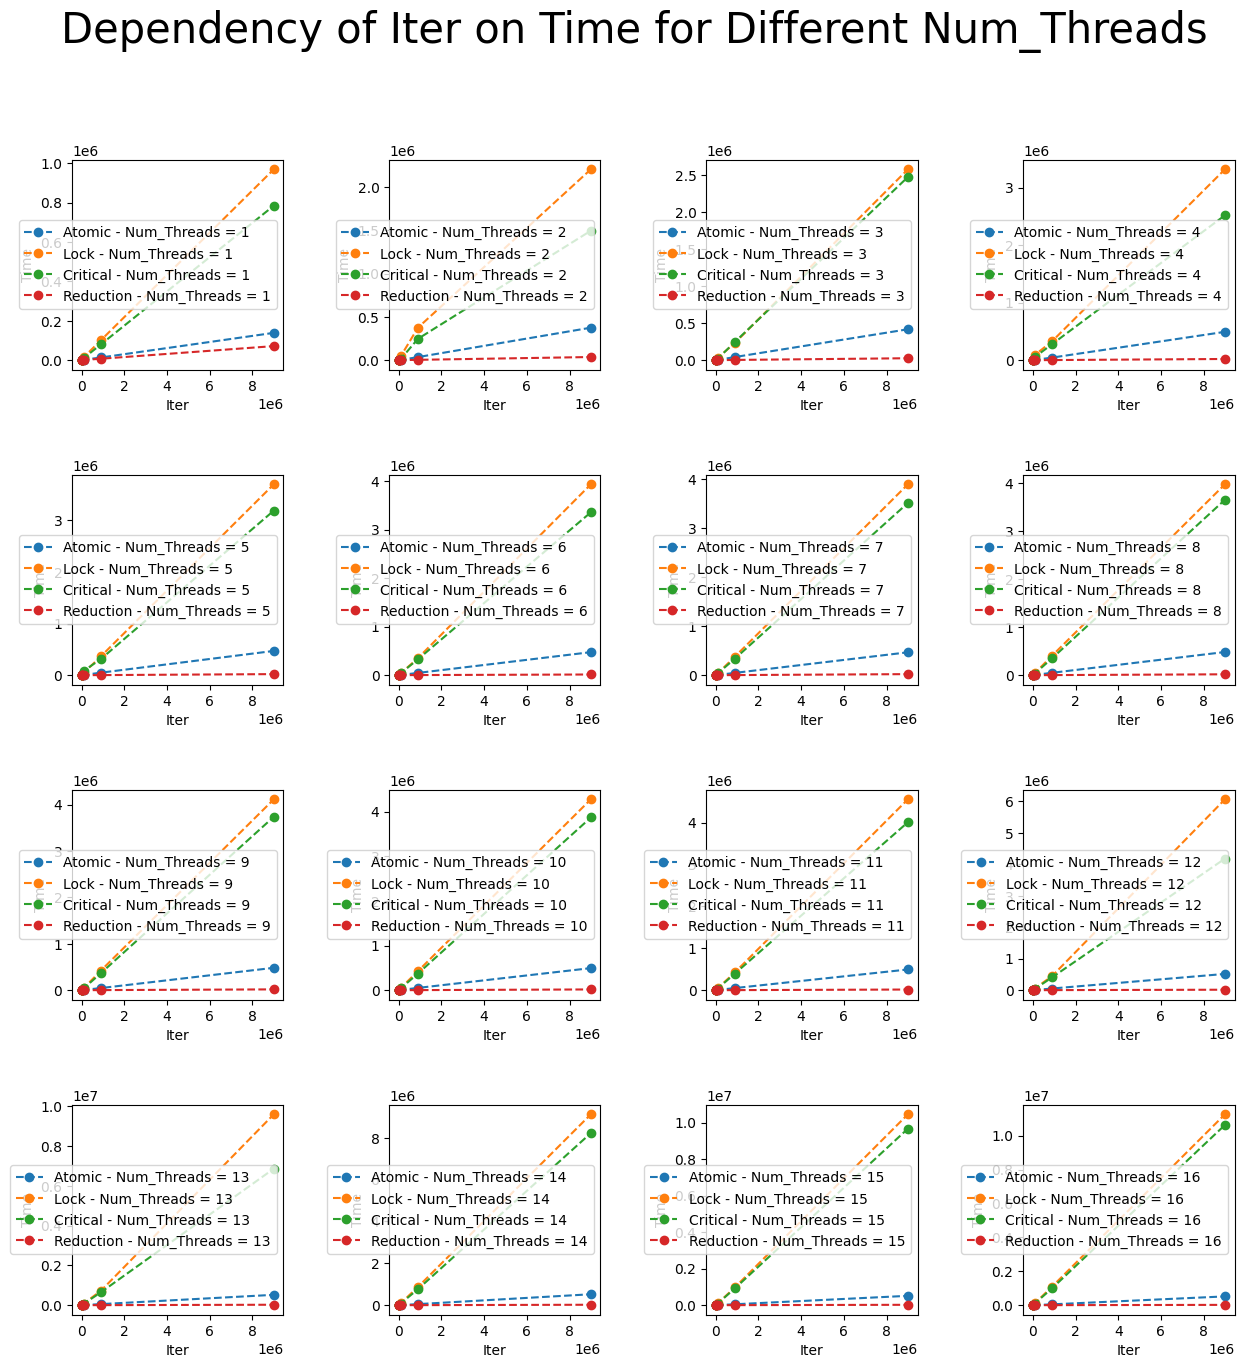

In [34]:
thread_groups_atomic = data_atomic.groupby('Num_Threads')
thread_groups_lock = data_lock.groupby('Num_Threads')
thread_groups_critical = data_critical.groupby('Num_Threads')
thread_groups_reduction = data_reduction.groupby('Num_Threads')

thread_groups = [thread_groups_atomic, thread_groups_lock, thread_groups_critical, thread_groups_reduction]
labels = ['Atomic', 'Lock', 'Critical', 'Reduction']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Iter on Time for Different Num_Threads', fontsize=30)

for group, label in zip(thread_groups, labels):
    for thread_count, group_data in group:
        plt.subplot(4, 4, thread_count)
        plt.plot(group_data['Iter'], group_data['Time'], 
                 linestyle='--', marker='o', 
                 label=f'{label} - Num_Threads = {thread_count}')

        plt.xlabel('Iter')
        plt.ylabel('Time')
        plt.legend()

plt.show()

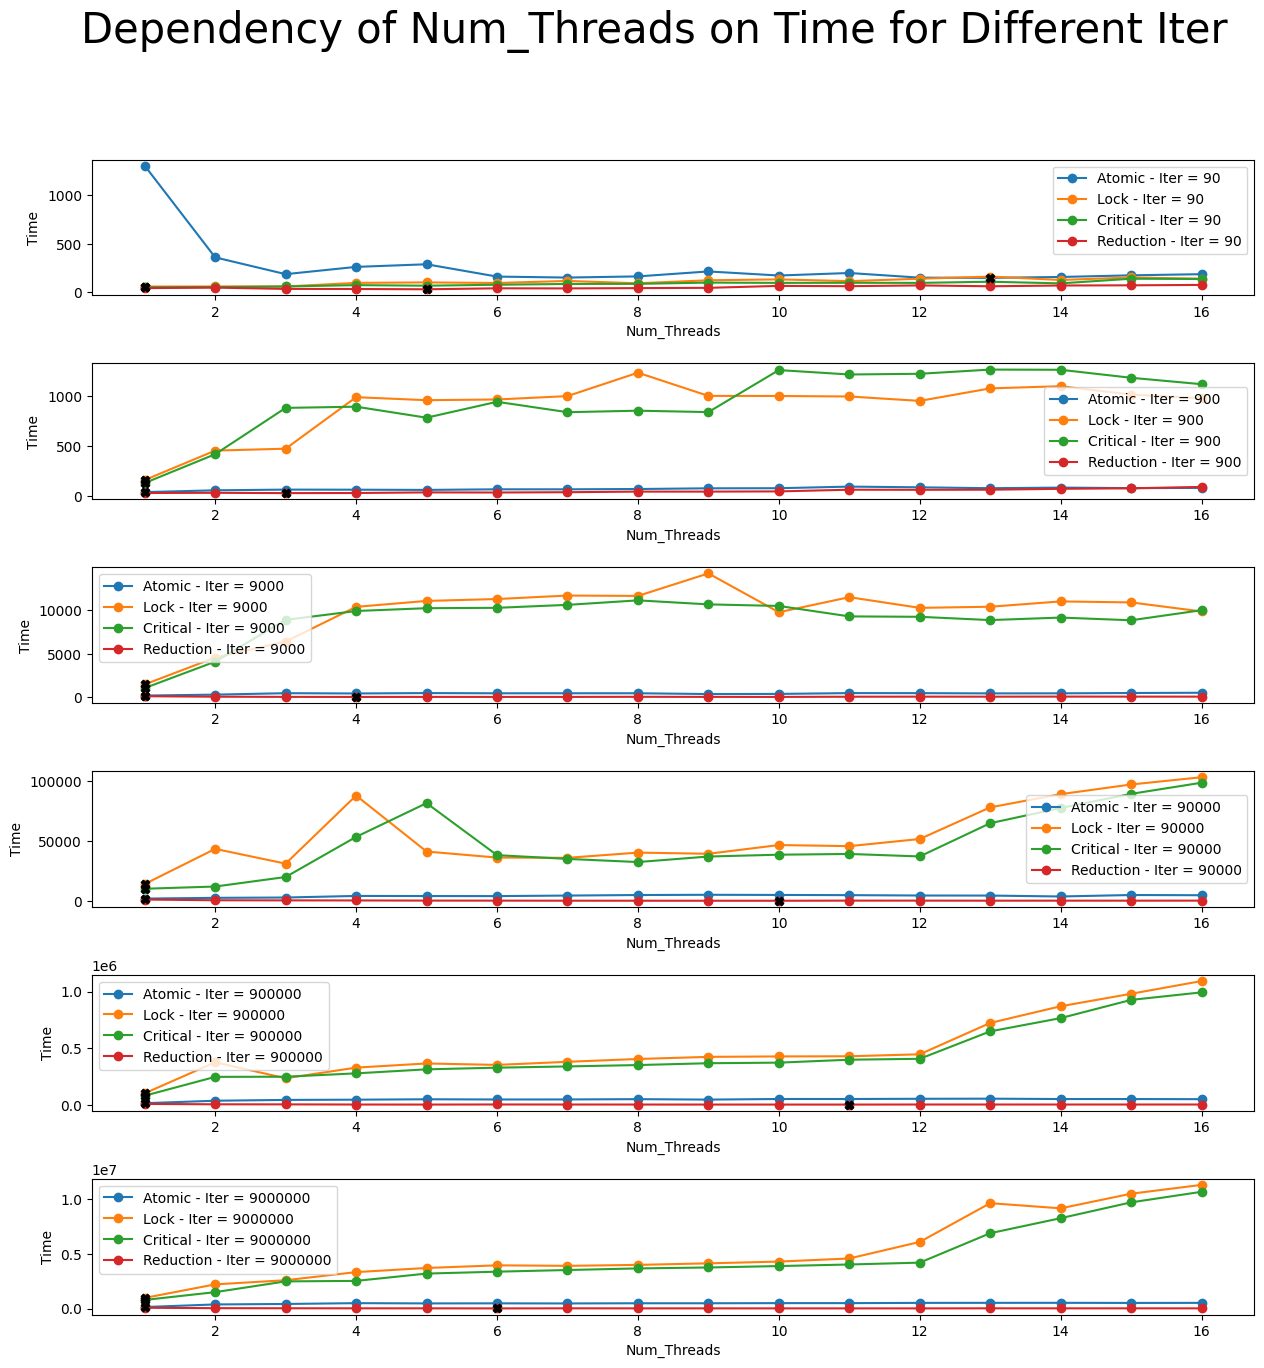

In [35]:
iter_groups_atomic = data_atomic.groupby('Iter', as_index=False)
iter_groups_lock = data_lock.groupby('Iter', as_index=False)
iter_groups_critical = data_critical.groupby('Iter', as_index=False)
iter_groups_reduction = data_reduction.groupby('Iter', as_index=False)

iter_groups = [iter_groups_atomic, iter_groups_lock, iter_groups_critical, iter_groups_reduction]
labels = ['Atomic', 'Lock', 'Critical', 'Reduction']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Time for Different Iter', fontsize=30)

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], group_data['Time'], 
                 marker='o', linestyle='-', 
                 label=f'{label} - Iter = {iter_value}')
        
        # Выделение точки с наименьшим значением красным цветом
        min_time_idx = group_data['Time'].idxmin()
        plt.scatter(group_data['Num_Threads'].iloc[min_time_idx], group_data['Time'].iloc[min_time_idx], color='black', marker='X', zorder=10)
        plt.xlabel('Num_Threads')
        plt.ylabel('Time')
        plt.legend()

plt.show()

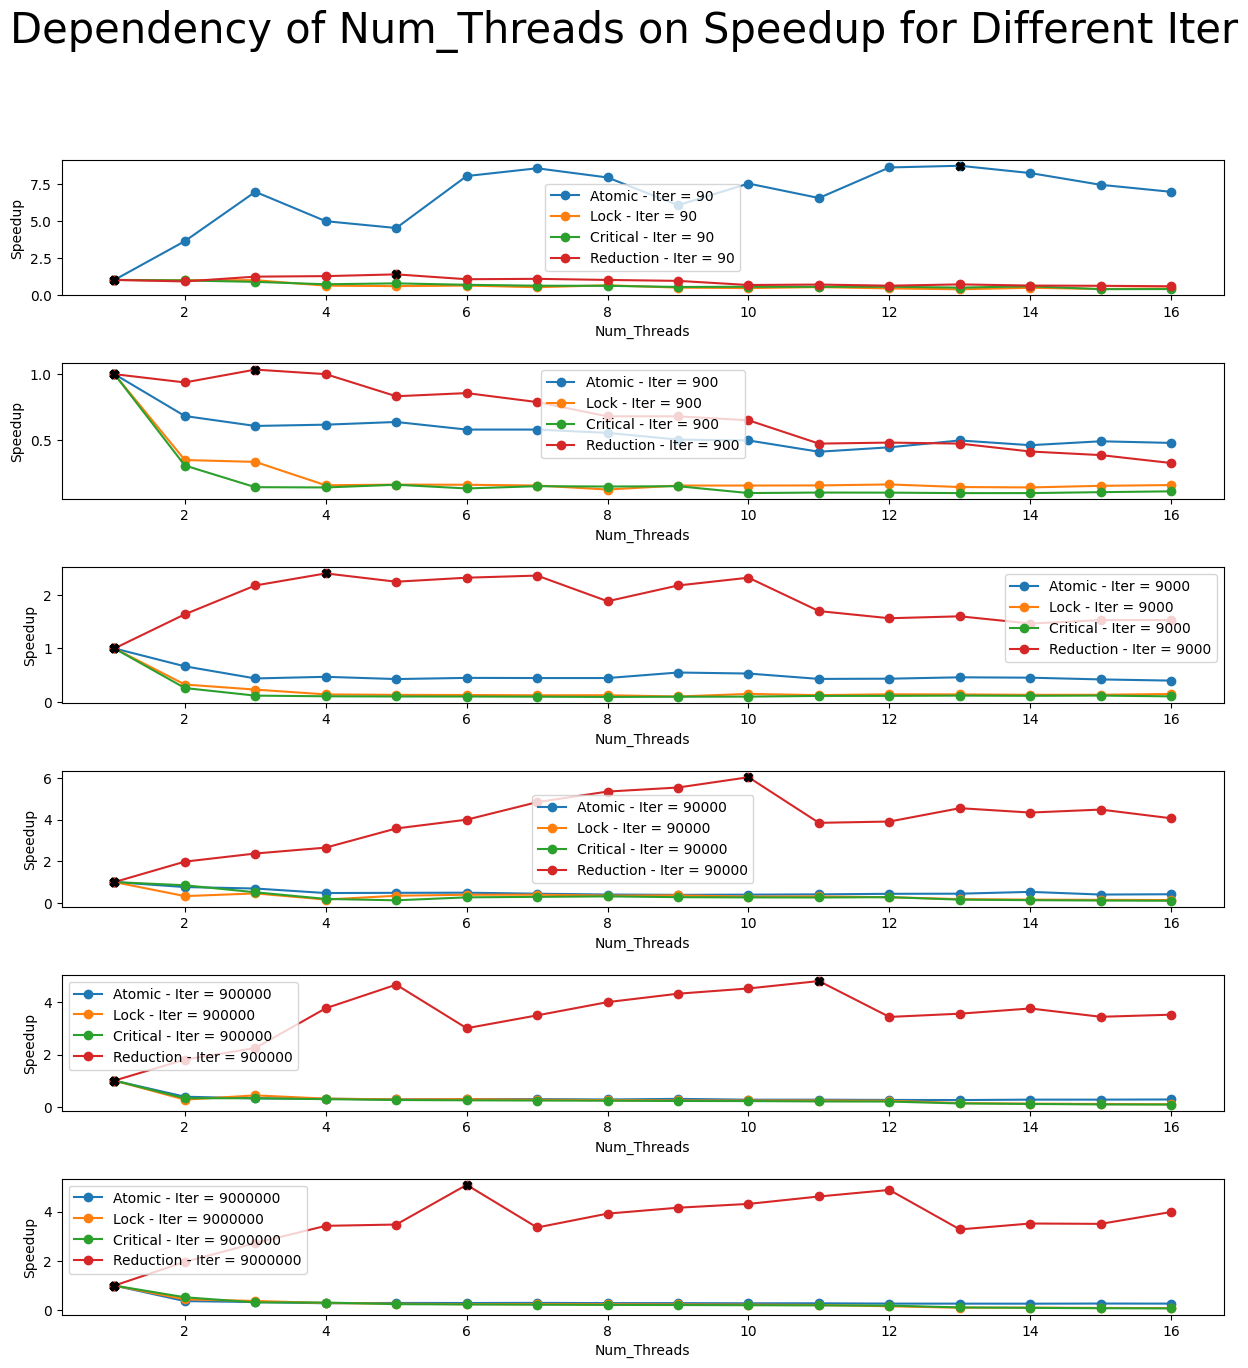

In [36]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Speedup for Different Iter', fontsize=30)

base_num_threads = 1  # Базовое количество потоков для расчета ускорения

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        base_time = group_data[group_data['Num_Threads'] == base_num_threads]['Time'].values[0]
        speedup = base_time / group_data['Time']
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], speedup, 
                 marker='o', linestyle='-', 
                 label=f'{label} - Iter = {iter_value}')
        
        # Выделение точки с наибольшим значением ускорения красным цветом
        max_speedup_idx = np.argmax(speedup)
        plt.scatter(group_data['Num_Threads'].iloc[max_speedup_idx], speedup.iloc[max_speedup_idx], color='black', marker='X', zorder=10)
        
        plt.xlabel('Num_Threads')
        plt.ylabel('Speedup')
        plt.legend()

plt.show()

# Вывод:
Из представленных графиков можно составить следующий рейтинг производительности для разных способов организации взаимоисключения: 
1. _Reduction_
2. _Atomic_
3. _Critical_
4. _Lock_
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 